<a href="https://colab.research.google.com/github/jiin124/2021_2_SAI_ML/blob/main/%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. K-평균 알고리즘 이해


## 사이킷런 KMeans 클래스 소개

In [94]:
class sklearn.cluster.KMeans(n_cluster=8,init\'k-means++',n_init=10,max_iter=300,tol=0.0001,
                             precompute_distances='auto',vervose=0,random_state=None,
                             copy_x=True,n_jobs=1,algorithm='auto')

SyntaxError: ignored

## K-평균을 이용한 붓꽃 데이터 세트 군집화

In [95]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
#더 편리한 데이터 핸들링을 위해 DataFrame으로 변환

df=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


붓꽃 데이터 세트를 3개 그룹으로 군집화해보겠다 이를 위해 n_cluster는 3,초기 중심 설정방식은 디폴트 값인 k-means++, 최대 반복 횟수 역시 디폴트 값인 max_iter=300으로 설정한 KMeans 객체를 만들고, 여기에 fit()을 수행하겠다. 

In [96]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [97]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


labels_의 값이 0,1,2로 돼 있어며, 이는 각 레코드가 첫 번째 군집, 두번재 군집, 세번째 군집에 속함을 의미한다. 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인해보겠다. 붓꽃 데이터 세트의 target값을 target컬럼으로 앞에서 구한 labels_값을 cluster 칼럼으로 지정해 df에 초가한 뒤에 groupby 연산을 실제 분류값인 target과 군집화 분류값인 cluster레벨로 적용해 target과 cluster 값 개수를 비교할 수 있다. 

In [98]:
df['target']=iris.target
df['cluster']=kmeans.labels_
iris_result=df.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


target값이 0,1은 어느정도 잘 분류가 되었으나, 2는 cluster가 0과 2로 분산되어 그루핑되었다.이제 붓꽃 데이터 세트의 군집화를 시각화해보겠다. 2차언 평면상에서 개별 데이터의 군집화를 시각적으로 표현하려고 한다. 붓꽃 데이ㅓㅌ 세트의 속성이 4개이므로 2차언 평면에 적합치 않아 PCA를 이용해 3개의 속성을 2개로 차언 축소한 뒤에 X좌표, Y좌표로 개별 데이터를 표현하도록 하겠다. 

In [99]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

df['pca_x']=pca_transformed[:,0]
df['pca_y']=pca_transformed[:,1]
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


pca_x는 X좌표값, pca_y는 Y좌표값을 나타낸다. 각 군집별로 cluster 0은 마커'o' cluster 1은 마커 's' cluster는 마커 '^'로 표현

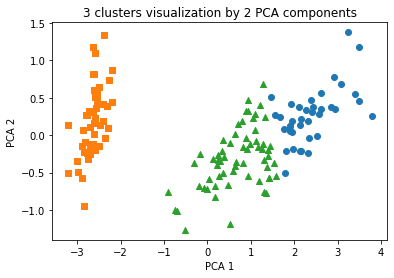

In [100]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind=df[df['cluster']==0].index
marker1_ind=df[df['cluster']==1].index
marker2_ind=df[df['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y 값 추출, o,s,^로 마커 표시
plt.scatter(x=df.loc[marker0_ind,'pca_x'],y=df.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=df.loc[marker1_ind,'pca_x'],y=df.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=df.loc[marker2_ind,'pca_x'],y=df.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization by 2 PCA components')
plt.show()



## 군집화 알고리즘 테스트를 위한 데이터 생성

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)

#y target값의 분포를 확인
unique,counts=np.unique(y,return_counts=True)
print(unique,counts)


(200, 2) (200,)
[0 1 2] [67 67 66]


In [102]:
import pandas as pd

clusterdf=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterdf['target']=y
clusterdf.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


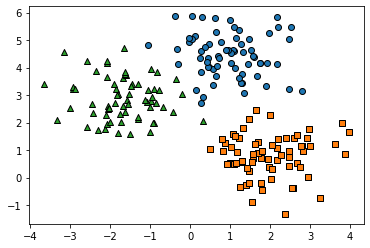

In [103]:
target_list=np.unique(y)

#각 타깃별 산점도의 마커 값.
markers=['o','s','^','p','d','H','x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
#target=0,target=1,taget=2 로 scatter plot을 marker별로 생성.

for target in target_list:
  target_cluster=clusterdf[clusterdf['target']==target]
  plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',
              marker=markers[target])
  
plt.show()


이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화해보겠다. 먼저 KMeans 객체에 fit_predict(x)를 수행해 make_blobs()의 피처 데이터 세트인 X데이터를 군집화한다. 이를 앞에서 구한 clusterdf dataframe의 kmeans_label칼럼으로 저장하겠다. 그리고 KMeans 객체의 cluster_centers_ 속성은 개별 군집의 중심 위치 좌표를 나타내기 위해 사용한다. 

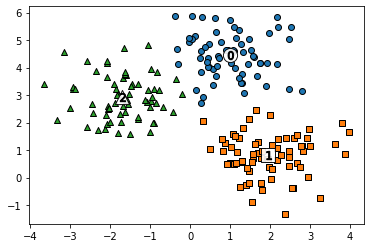

In [104]:
# KMeans 객체를이용해 x데이터를 K-means 클러스터링 수행
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterdf['kmeans_label']=cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','p','d','h','x']

#군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster=clusterdf[clusterdf['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',
              marker=markers[label])
  
  #군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',
              alpha=0.9,edgecolor='k',marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',
              marker='$%d$' % label)
  
plt.show()

In [105]:
print(clusterdf.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


## 붓꽃 데이터 세트를 이용한 군집 평가

In [106]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표를 구하기 위한 API추가
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
df=pd.DataFrame(data=iris.data,columns=feature_names)
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(df)
df['cluster']=kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_samples(iris.data,df['cluster'])
print('silhouette_samples() return 값의 shape',score_samples.shape)

#df에 실루엣계수 칼럼 추가
df['silhouette_coeff']=score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score=silhouette_score(iris.data,df['cluster'])
print('붓꽃 데이터 세트 silhouette analysis score:{0:.3f}'.format(average_score))
df.head(3)


silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 silhouette analysis score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [107]:
df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


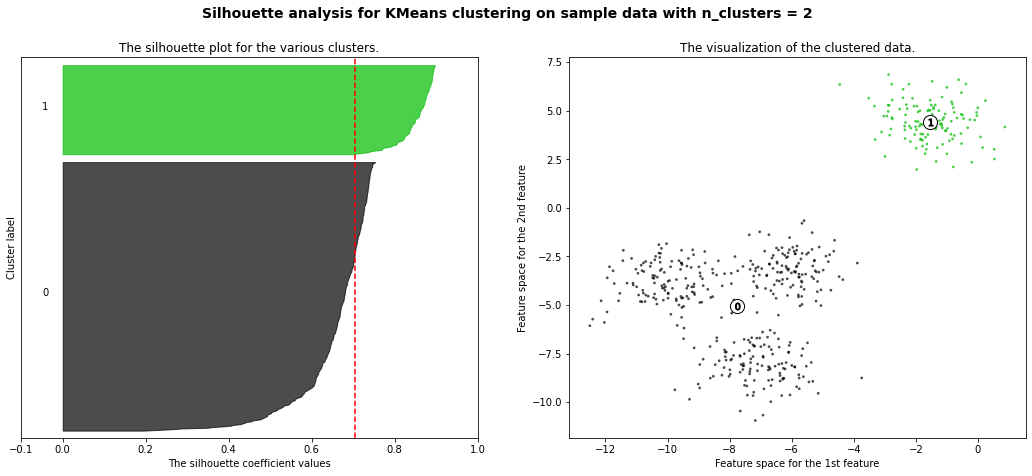

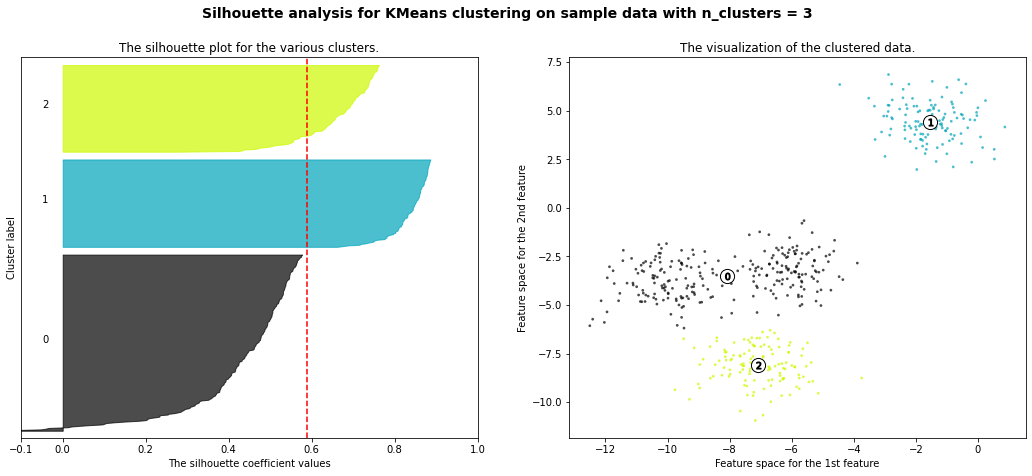

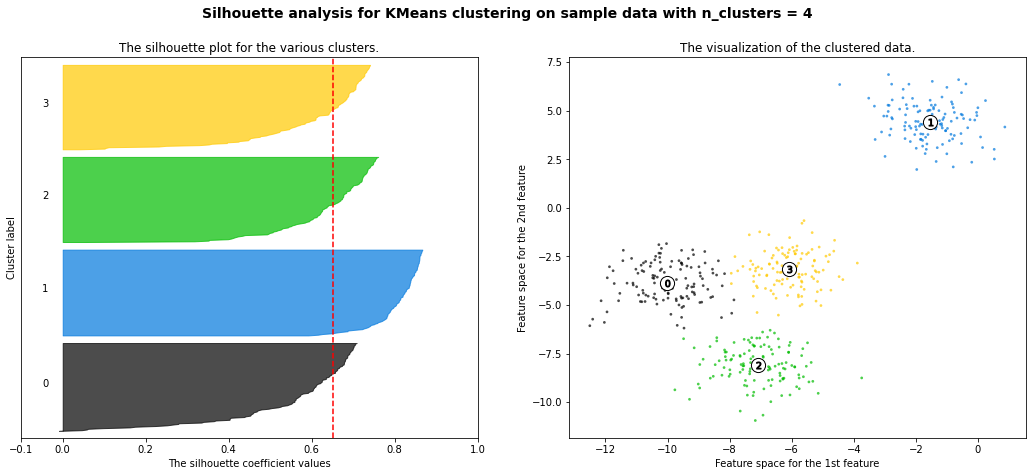

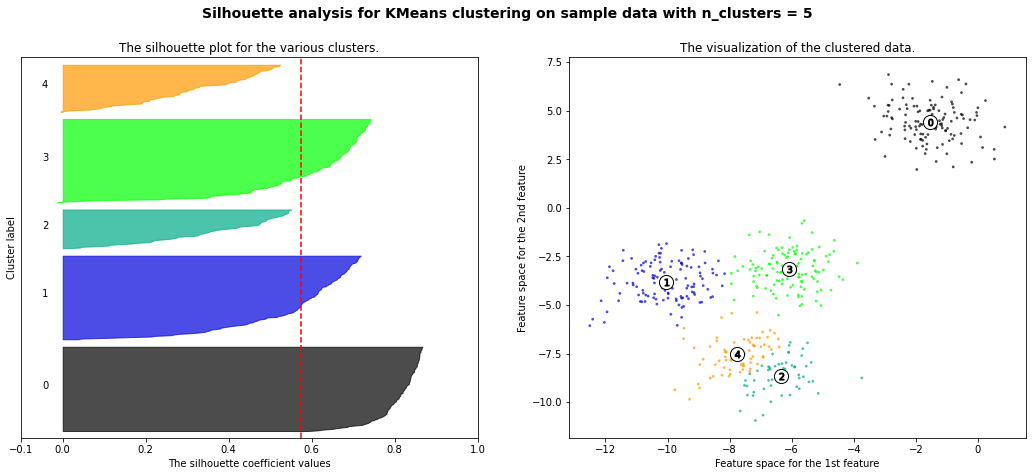

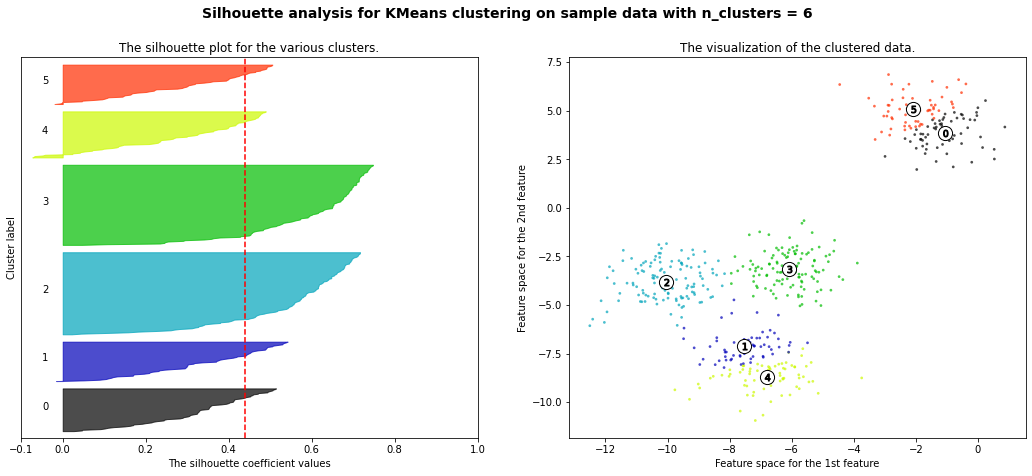

In [108]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## 3. 평균이동

In [109]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.7,random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


군집이 0부터 5까지 6개로 분류되었다 지나치게 세분화되었다. 일반적으로 bandwidth값을 작게 핤록 군집 개수가 많아진다 이번에 bandwidth를 살짝 높인 1.0으로 해서 meanshift를 수행.

In [110]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [111]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


In [112]:
import pandas as pd

df=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
df['target']=y

#estimator_bandwidth() 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X)


meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


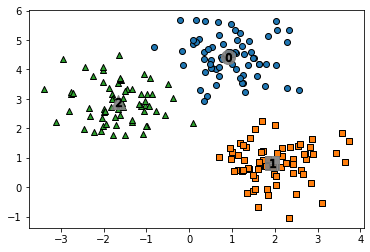

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

df['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster=df[df['meanshift_label']==label]
  center_x_y=centers[label]
  #군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])

  #군집별 중심표현
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,
              marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',marker='$%d$'%label)

plt.show()

In [114]:
print(df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


## GMM

In [115]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

#좀더 편리한 데이터 핸들링을 위해 dataframe으로 변환
df=pd.DataFrame(data=iris.data,columns=feature_names)
df['target']=iris.target

In [116]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

#군집화 결과를 df의 gmm_cluster 칼럼명으로 저장
df['gmm_cluster']=gmm_cluster_labels
df['target']=iris.target

#target 값에 따라 gmm_cluster값이 어떻게 매핑되었는지 확인
iris_result=df.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


In [117]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
df['kmeans_cluster']=kmeans_cluster_labels
iris_result=df.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64


## GMM과 Kmeans 비교

In [118]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

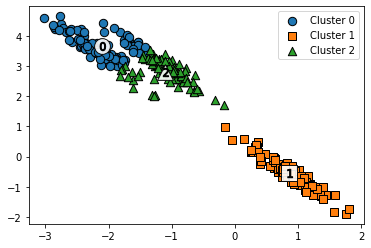

In [119]:
from sklearn.datasets import make_blobs

#make_blobs()로300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y=make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.5,random_state=0)

#길게 늘어난 타언형의 데이터 세트를 생성하기 위해 변환한
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

#feature 데이터 세트와 make_lobs()의 y결괏값을 dataframe으로 저장
df = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
df['target']=y

# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
df['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, df, 'kmeans_label',iscenter=True)

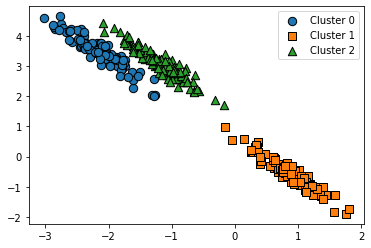

In [120]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
df['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, df, 'gmm_label',iscenter=False)

In [121]:
print('### Kmeans clustering ###')
print(df.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Misxture clustering ###')
print(df.groupby('target')['gmm_label'].value_counts())

### Kmeans clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Misxture clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


In [122]:
df.head()

,ftr1,ftr2,target,kmeans_label,gmm_label
0,-1.671828,3.814284,0,0,2
1,0.945385,-0.901944,1,1,1
2,-0.959199,2.857152,0,2,2
3,-2.187799,3.569903,2,0,0
4,-1.967100,3.067528,2,0,0


## DBSCAN 

In [123]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

#좀더 편리한 데이터 핸들링을 위해 dataframe으로 변환
df=pd.DataFrame(data=iris.data,columns=feature_names)
df['target']=iris.target

In [124]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
df['dbscan_cluster']=dbscan_labels
df['target']=iris.target
iris_result=df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


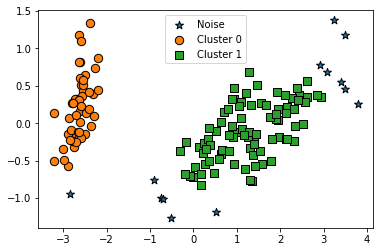

In [125]:
from sklearn.decomposition import PCA

#2차언으로 시각화하기 위해 PCA n_component=2로 피처 데이터 세트 변환
pca=PCA(n_components=2,random_state=0)
pca_transformed=pca.fit_transform(iris.data)

#visualize_cluster_2d함수는 ftr1,ftr2 칼럼을 좌표에 표현하므로 pca 변환값을 해당 칼럼으로 생성
df['ftr1']=pca_transformed[:,0]
df['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan,df,'dbscan_cluster',iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


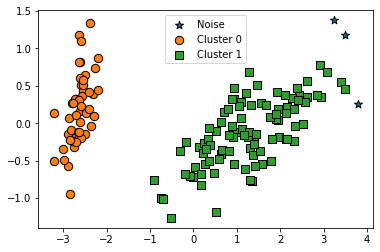

In [126]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

df['dbscan_cluster']=dbscan_labels
df['target']=iris.target

iris_result=df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan,df,'dbscan_cluster',iscenter=False)

In [127]:
dbscan=DBSCAN(eps=0.6,min_samples=16,metric='euclidean')

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


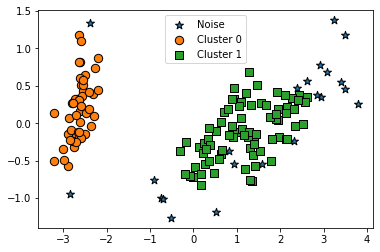

In [128]:
dbscan_labels=dbscan.fit_predict(iris.data)

df['dbscan_cluster']=dbscan_labels
df['target']=iris.target

iris_result=df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan,df,'dbscan_cluster',iscenter=False)

### DBSCAN 적용하기 - make_circles() 데이터 세트

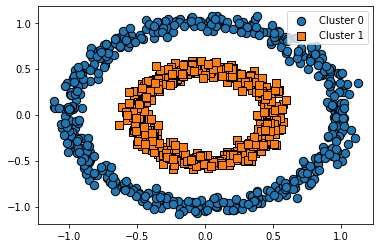

In [134]:
from sklearn.datasets import make_circles

X,y=make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
df=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
df['target']=y

visualize_cluster_plot(None,df,'target',iscenter=False)


#### KMEans

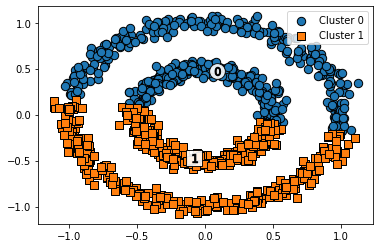

In [130]:
#Kmeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2, max_iter=1000,random_state=0)
kmeans_labels=kmeans.fit_predict(X)
df['kmeans_cluster']=kmeans_labels
visualize_cluster_plot(kmeans,df,'kmeans_cluster',iscenter=True)

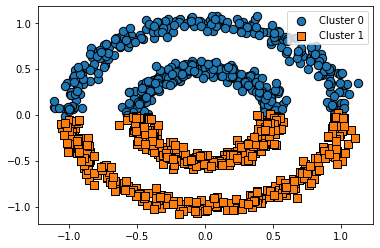

In [137]:
#GMM
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2,random_state=0)
gmm_label=gmm.fit(X).predict(X)
df['gmm_cluster']=gmm_label
visualize_cluster_plot(gmm,df,'gmm_cluster',iscenter=False)

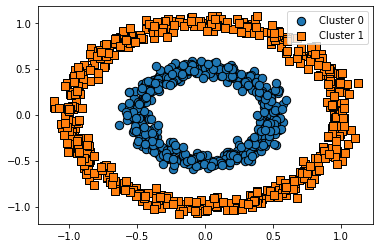

In [140]:
#DBSCAN으로 make_circles()데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2,min_samples=10,metric='euclidean')
dbscan_labels=dbscan.fit_predict(X)
df['dbscan_cluster']=dbscan_labels
visualize_cluster_plot(dbscan,df,'dbscan_cluster',iscenter=False)